<a href="https://colab.research.google.com/github/Gaukhar-ai/working-in-pairs/blob/master/SVR_model_absenteeism_data_grid_search_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [4]:
#answer below:
absent.dtypes


ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


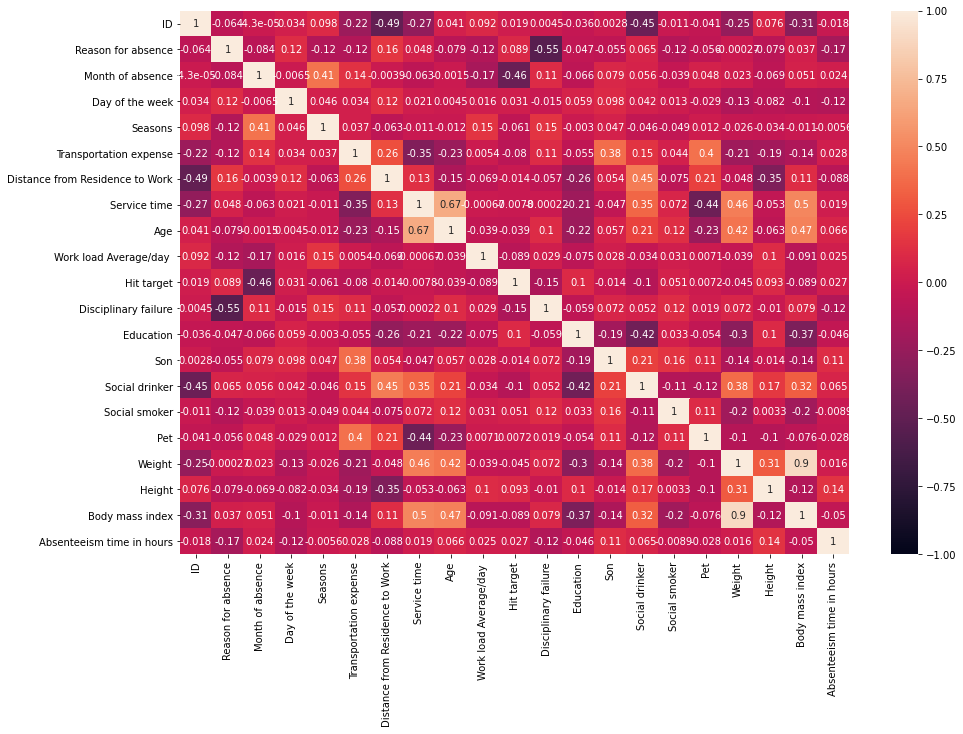

In [5]:

plt.figure(figsize = (15, 10))
import seaborn as sns
sns.heatmap(absent.corr(), vmin=-1, vmax=1, annot=True)
plt.show(
    
)


In [6]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [7]:
absent = absent.drop(columns = ['Height', 'Weight', 'ID'])

In [8]:
cat_cols = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Education']

absent_dum = pd.get_dummies(absent, columns=cat_cols)
absent_dum.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours,Reason for absence_0,Reason for absence_1,Reason for absence_2,Reason for absence_3,Reason for absence_4,Reason for absence_5,Reason for absence_6,Reason for absence_7,Reason for absence_8,Reason for absence_9,Reason for absence_10,Reason for absence_11,Reason for absence_12,Reason for absence_13,Reason for absence_14,Reason for absence_15,Reason for absence_16,Reason for absence_17,Reason for absence_18,Reason for absence_19,Reason for absence_21,Reason for absence_22,Reason for absence_23,Reason for absence_24,Reason for absence_25,Reason for absence_26,Reason for absence_27,Reason for absence_28,Month of absence_0,Month of absence_1,Month of absence_2,Month of absence_3,Month of absence_4,Month of absence_5,Month of absence_6,Month of absence_7,Month of absence_8,Month of absence_9,Month of absence_10,Month of absence_11,Month of absence_12,Day of the week_2,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Seasons_1,Seasons_2,Seasons_3,Seasons_4,Education_1,Education_2,Education_3,Education_4
0,289,36,13,33,239.554,97,0,2,1,0,1,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,118,13,18,50,239.554,97,1,1,1,0,0,31,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,179,51,18,38,239.554,97,0,0,1,0,0,31,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,279,5,14,39,239.554,97,0,2,1,1,0,24,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
4,289,36,13,33,239.554,97,0,2,1,0,1,30,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [9]:
absent['Reason for absence'].value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64

In [10]:
absent['Seasons'].value_counts()

4    195
2    192
3    183
1    170
Name: Seasons, dtype: int64

In [11]:
absent_dum = absent_dum.drop(columns = ['Reason for absence_23','Month of absence_3', 'Day of the week_2', 'Seasons_4', 'Education_1'])


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [13]:
X = absent_dum.drop(columns=["Absenteeism time in hours"])
y = absent_dum["Absenteeism time in hours"]
y = np.log(absent['Absenteeism time in hours']+1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=55
)


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR



Scale the independent variables using the standard scaler

In [16]:
# answer below:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 


In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [18]:
# answer below:
from sklearn.svm import SVR




In [19]:
model = SVR() 
model.fit(X_train, y_train)



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7383812918097725
0.4977624824624989


If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [21]:
bin_cols = ["Disciplinary failure", "Social drinker", "Social smoker"]


In [22]:
num_cols = [
    "Transportation expense",
    "Distance from Residence to Work",
    "Service time",
    "Age",
    "Work load Average/day ",
    "Hit target",
    "Education",
    "Son",
    "Pet",
    "Height",
    "Body mass index",
]

In [23]:
cat_cols = ["Reason for absence", "Seasons", "Month of absence", "Day of the week"]
drop_cats = [0, 4, 0, 2]

In [24]:
preprocessing = ColumnTransformer(
    [
       ("dummy", OneHotEncoder(drop=drop_cats), cat_cols),
       ("scale", StandardScaler(), num_cols),
    ],
    remainder="passthrough",
)


In [25]:
pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])


In [30]:
# answer below:
grid = {
    'C': [0.1, 1, 5], 
    "kernel": ["poly", "rbf"],
    'degree': [3, 4]
}



In [31]:
model = GridSearchCV(SVR(), grid, verbose=1)
model.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 5], 'degree': [3, 4],
                         'kernel': ['poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

In [32]:
model.best_params_

{'C': 1, 'degree': 3, 'kernel': 'rbf'}

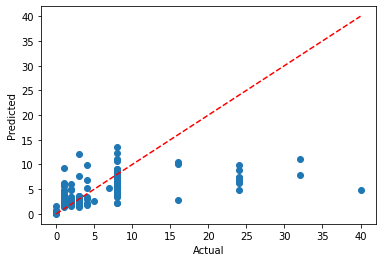

In [33]:
# answer below:
y_pred = model.predict(X_test)

# Only do this if using log transformed y in training
y_test = np.exp(y_test) - 1
y_pred = np.exp(y_pred) - 1

mn = y_test.min()
mx = y_test.max()

plt.scatter(y_test, y_pred)
plt.plot([mn, mx], [mn, mx], "--", c="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()